## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
sns.set()
import operator
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Load data

In [3]:
rating_DF=pd.read_csv('ratings.csv')
rating_DF.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
rating_DF.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [5]:
genre_DF=pd.read_csv('movies.csv')
genre_DF

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
genre_DF.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


## Rearrange data and data wrangling

In [7]:
movieID=genre_DF['movieId']
movieName=genre_DF['title']
userID=rating_DF['userId'].unique()

In [58]:
year=[]
movie=[]
for i in movieName:
    year.append(i[-5:-1].lstrip())
    movie.append(i[:-7].replace(' ','_'))

print(movie[1:6])
#print(year)
#print(len(year))

genre_DF['movieName']=movie
genre_DF['year']=year
genre_DF.head()


['Jumanji', 'Grumpier_Old_Men', 'Waiting_to_Exhale', 'Father_of_the_Bride_Part_II', 'Heat']


,movieId,title,genres,movieName,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy_Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier_Old_Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting_to_Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father_of_the_Bride_Part_II,1995


In [9]:
# Get a matrix of userIndex by movieId by ratings
DF=pd.DataFrame(index=movieID)
for i in userID:
    temp=rating_DF[rating_DF.userId==i]['rating']
    temp.index=rating_DF[rating_DF.userId==i]['movieId']
    DF=pd.concat([DF,temp],axis=1)
DF.columns=userID
DF.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#DF.index=movie
DF.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Transpose for further analaysis
DF_T=DF.T

#DF_T.columns
DF_T=DF_T.fillna(0)
DF_T.head()
610-DF_T[DF_T[1]>0][1].count()

395

In [97]:
# rating and frequency of each movie
movie_cor_DF=pd.DataFrame(index=movieID,columns=['Ave_rating','Freq'])

for i in movieID:
    nRating= DF_T[DF_T[i]>0.0][i].count()
    if nRating > 0:
        movie_cor_DF.loc[i,'Freq'] = nRating
        movie_cor_DF.loc[i,'Ave_rating'] = sum(DF_T[i]) / nRating
    else:
        movie_cor_DF.loc[i,'Freq'] = 0
        movie_cor_DF.loc[i,'Ave_rating'] = 0
#movie_freq['Gintama: The Movie ']
movie_cor_DF.head()

,Ave_rating,Freq
movieId,,
1,3.92093,215
2,3.43182,110
3,3.25962,52
4,2.35714,7
5,3.07143,49


In [98]:
# Get the names and genre of top rated movies
movie_cor_DF['movieId']=movie_cor_DF.index
movie_cor_DF=pd.merge(movie_cor_DF,genre_DF,on=movie_cor_DF['movieId'])
movie_cor_DF.index=movie_cor_DF['movieId_x']
movie_cor_DF.head()

,key_0,Ave_rating,Freq,movieId_x,movieId_y,title,genres,movieName,year
movieId_x,,,,,,,,,
1,1,3.92093,215,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy_Story,1995
2,2,3.43182,110,2,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
3,3,3.25962,52,3,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier_Old_Men,1995
4,4,2.35714,7,4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting_to_Exhale,1995
5,5,3.07143,49,5,5,Father of the Bride Part II (1995),Comedy,Father_of_the_Bride_Part_II,1995


In [99]:
movie_cor_DF.drop(columns=['key_0','movieId_x','movieId_y','title'])

,Ave_rating,Freq,genres,movieName,year
movieId_x,,,,,
1,3.92093,215,Adventure|Animation|Children|Comedy|Fantasy,Toy_Story,1995
2,3.43182,110,Adventure|Children|Fantasy,Jumanji,1995
3,3.25962,52,Comedy|Romance,Grumpier_Old_Men,1995
4,2.35714,7,Comedy|Drama|Romance,Waiting_to_Exhale,1995
5,3.07143,49,Comedy,Father_of_the_Bride_Part_II,1995
...,...,...,...,...,...
193581,4,1,Action|Animation|Comedy|Fantasy,Black_Butler:_Book_of_the_Atlantic,2017
193583,3.5,1,Animation|Comedy|Fantasy,No_Game_No_Life:_Zero,2017
193585,3.5,1,Drama,Flint,2017


In [100]:
#print the list of top 10 mostly watched movies
sort_movie_DF=movie_cor_DF.sort_values(by=["Freq",'Ave_rating'],ascending=False)
print(sort_movie_DF[['movieName','Ave_rating','year','Freq','genres']].head(10))

                                    movieName Ave_rating  year Freq  \
movieId_x                                                             
356                              Forrest_Gump    4.16413  1994  329   
318                 Shawshank_Redemption,_The    4.42902  1994  317   
296                              Pulp_Fiction    4.19707  1994  307   
593                 Silence_of_the_Lambs,_The    4.16129  1991  279   
2571                              Matrix,_The    4.19245  1999  278   
260        Star_Wars:_Episode_IV_-_A_New_Hope    4.23108  1977  251   
480                             Jurassic_Park       3.75  1993  238   
110                                Braveheart    4.03165  1995  237   
589                Terminator_2:_Judgment_Day    3.97098  1991  224   
527                          Schindler's_List      4.225  1993  220   

                                     genres  
movieId_x                                    
356                Comedy|Drama|Romance|War  
318      

In [101]:
#correlation plot
df_movie_cor=sort_movie_DF[['Ave_rating','year','Freq']]
df_movie_cor.fillna(0)
df_movie_cor.Freq.astype('float').dtypes
df_movie_cor.Ave_rating.astype('float').dtypes
df_movie_cor.shape

(9742, 3)

In [102]:
year=pd.DataFrame(df_movie_cor.year)
year.applymap(np.isreal)
badyear=[]

for i in range(len(year)):

    if year.iloc[i].str.isdigit().bool():
        year.iloc[i].astype(int)
    else:
        badyear.append(i)
        

In [103]:
df_movie_cor=df_movie_cor.drop((df_movie_cor.index[badyear]))
df_movie_cor.shape

(9719, 3)

In [107]:
df_movie_cor.year.astype('float').dtypes
df_movie_cor=df_movie_cor.astype('float')
df_movie_cor.dtypes

Ave_rating    float64
year          float64
Freq          float64
dtype: object

In [108]:
corr = df_movie_cor.corr()
print (df_movie_cor)
print ( corr)

           Ave_rating    year   Freq
movieId_x                           
356          4.164134  1994.0  329.0
318          4.429022  1994.0  317.0
296          4.197068  1994.0  307.0
593          4.161290  1991.0  279.0
2571         4.192446  1999.0  278.0
...               ...     ...    ...
30892        0.000000  2004.0    0.0
32160        0.000000  1934.0    0.0
32371        0.000000  1948.0    0.0
34482        0.000000  1951.0    0.0
85565        0.000000  2011.0    0.0

[9719 rows x 3 columns]
            Ave_rating      year      Freq
Ave_rating    1.000000 -0.100491  0.129306
year         -0.100491  1.000000 -0.004030
Freq          0.129306 -0.004030  1.000000


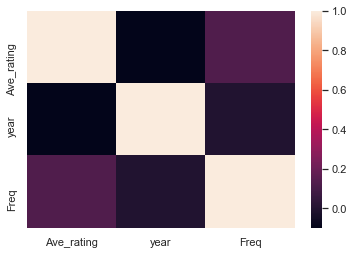

In [109]:
np.random.seed(0)

ax = sns.heatmap(corr)

In [ ]:
# Get a list of genre
genre_list=set()
genre_freq={}
genre=genre_DF['genres'].str.split('|')
genre=np.array(genre)
for movie in genre:
    for g in movie:
        g = g.lstrip()
        if g not in genre_list:
            genre_list.add(g)
            genre_freq[g]=1
        else:
            genre_freq[g]+=1
genre_list           

In [ ]:
movie_genre_dict={}
for m in movieID:
    movie_genre_dict[m]=genre_DF[genre_DF['movieId']==1]['genres'].str.split('|')

In [ ]:
# corrlation matrix of movie genres towards: frequency, ratings


In [ ]:
sorted_genre_dict = sorted(genre_freq.items(), key = operator.itemgetter(1), reverse = True)

x_axis = list()
y_axis = list()

for item in sorted_genre_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='Genre', ylabel='Number of Movie', title = 'Most number of Genre')
plt.show()
